## Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_flat+sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

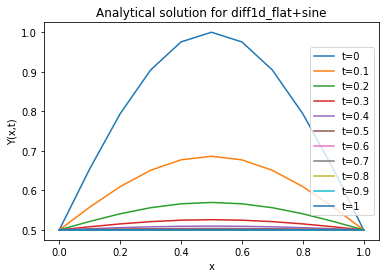

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [9]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(3)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 0.009206
         Iterations: 8000
         Function evaluations: 8714
         Gradient evaluations: 8714
24min 19s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.009206393858536749
 hess_inv: array([[ 2.11007847e+01,  1.17972297e+01, -4.05340059e+01, ...,
        -1.31713748e+01,  1.50988871e+04,  2.85151400e+04],
       [ 1.17933766e+01,  7.76830823e+00, -9.82569196e-01, ...,
        -3.94395491e+00,  8.73391731e+03,  1.64455254e+04],
       [-4.09361197e+01, -1.12157498e+00,  8.93520508e+03, ...,
         1.08378484e+02,  1.98042378e+04,  3.42875205e+04],
       ...,
       [-1.30801069e+01, -3.89043003e+00,  1.05012116e+02, ...,
         6.84525680e+01, -2.93180630e+03, -5.58688937e+03],
       [ 1.51451178e+04,  8.75973183e+03,  1.92241209e+04, ...,
        -2.90400902e+03,  2.44122611e+07,  4.71141935e+07],
       [ 2.86066939e+04,  1.64959493e+04,  3.32951403e+04, ...,
        -5.53958255e+03,  4.71144296e+07,  9.10488227e

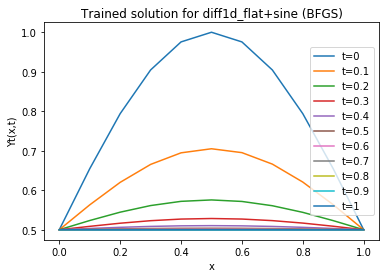

In [10]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

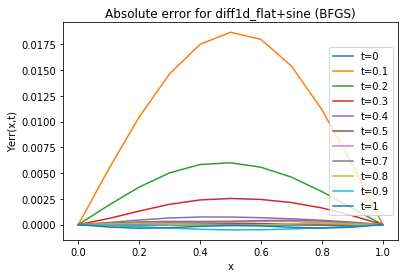

In [11]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

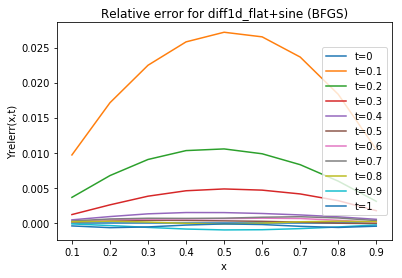

In [12]:
Yrelerr1 = (Yt1[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (default, maxiter=16000)

In [13]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['maxiter'] = 16000
opts = {}
np.random.seed(3)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

         Current function value: 0.009205
         Iterations: 8146
         Function evaluations: 8886
         Gradient evaluations: 8874
24min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.009205415939706247
 hess_inv: array([[ 2.49005731e+01,  1.27044283e+01, -4.16927650e+01, ...,
        -1.62626693e+01,  2.25911027e+04,  4.36617651e+04],
       [ 1.26098002e+01,  8.18904334e+00,  3.90270904e+00, ...,
        -3.14155829e+00,  7.90646978e+03,  1.49973381e+04],
       [-4.19050107e+01,  3.02951807e+00,  9.29755098e+03, ...,
         1.13431724e+02,  7.19576158e+04,  1.39266321e+05],
       ...,
       [-1.66693710e+01, -3.38803653e+00,  1.13679894e+02, ...,
         7.91245099e+01, -2.09567495e+04, -4.14341613e+04],
       [ 2.35146772e+04,  7.86744537e+03,  6.39757963e+04, ...,
        -2.32094616e+04,  8.46138858e+07,  1.67308275e+08],
       [ 4.54523446e+04,  1.49272913e+04,  1.23582076e+05, ...,
        -4.57568482e+04,  1.67151263e+08,  3.30648296e

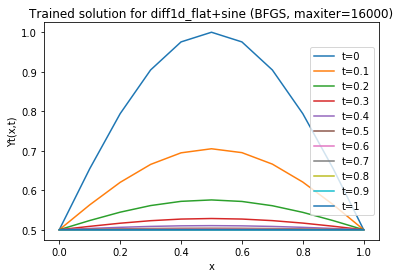

In [14]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxiter=%d)' % (eq_name, trainalg, options['maxiter']));

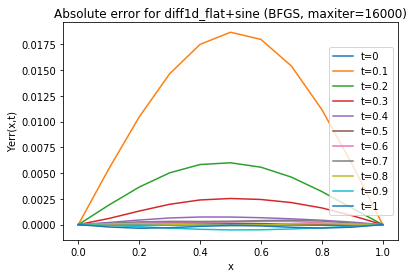

In [15]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxiter=%d)' % (eq_name, trainalg, options['maxiter']));

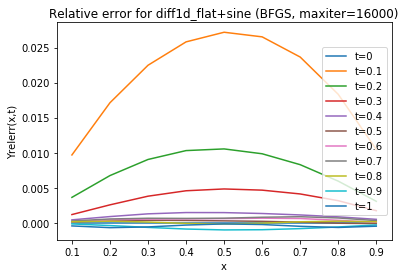

In [16]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, maxiter=%d)' % (eq_name, trainalg, options['maxiter']));